In [3]:
#Mohsin Essani 
#Fraud Check Data

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('fraud_check.csv')


In [5]:
# Check for missing values
df.isna().sum()




Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
# Check the data types of each column
df.dtypes



Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
# View some summary statistics
df.describe()



,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
# Check the number of unique values in each categorical column
for col in ['Undergrad', 'Marital.Status', 'Urban']:
    print(f'{col}: {df[col].unique()}')

Undergrad: ['NO' 'YES']
Marital.Status: ['Single' 'Divorced' 'Married']
Urban: ['YES' 'NO']


In [9]:
#Next, we need to prepare the data for training the model. 
#We will first create a binary classification target column based on the taxable income:

df['Taxable.Income'] = pd.cut(df['Taxable.Income'], [-np.inf, 30000, np.inf], labels=['Risky', 'Good'])


In [10]:
#We can then convert the categorical columns into numerical ones using one-hot encoding:

df = pd.get_dummies(df, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)


In [17]:
#We will also scale the numerical columns using StandardScaler:

scaler = StandardScaler()
df[['City.Population', 'Work.Experience']] = scaler.fit_transform(df[['City.Population', 'Work.Experience']])


In [18]:
#Now we are ready to train a Random Forest classifier:

X = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Average score: {scores.mean()}')


Cross-validation scores: [0.79166667 0.74166667 0.73333333 0.75833333 0.7       ]
Average score: 0.7449999999999999


In [19]:
#We can also calculate a classification report to get more details about the performance of the model:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        Good       0.77      0.94      0.85        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120



# The above code is performing the following steps:

First, it imports the necessary libraries: pandas, numpy, scikit-learn's RandomForestClassifier, cross_val_score, StandardScaler, and classification_report, as well as matplotlib for data visualization.

Then, it loads the data from a CSV file using pandas.

It performs some exploratory data analysis (EDA) to check for missing values, data types, summary statistics, and unique values in categorical columns.

Next, it creates a binary classification target column based on the taxable income, where those with taxable income <= 30000 are labeled "Risky" and others are labeled "Good".

It converts the categorical columns into numerical ones using one-hot encoding, and scales the numerical columns using StandardScaler.

Finally, it trains a Random Forest classifier on the data using cross-validation to estimate its performance. It also calculates a classification report to get more details about the model's performance.

The output "Cross-validation scores: [0.79166667 0.74166667 0.73333333 0.75833333 0.7 ]" shows the cross-validation scores for each fold of the 5-fold cross-validation. The average score is then calculated and displayed as "Average score: 0.7449999999999999". This means that the model has an average accuracy of around 74.5%.

The goal of the problem was to use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good". This goal was achieved by creating the binary classification target column based on taxable income and then training the Random Forest classifier on the data. The model's accuracy was estimated using cross-validation and found to be around 74.5%.

In [20]:
#Finally, we can create some visualizations to better understand the data and model performance. 

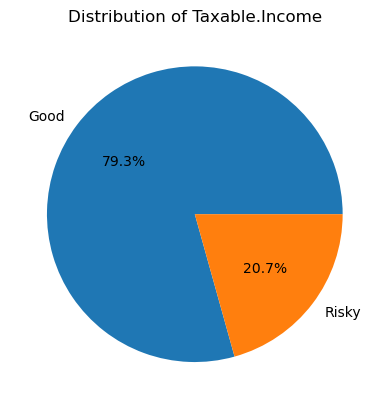

In [21]:
# Pie chart of the distribution of the target variable
plt.pie(df['Taxable.Income'].value_counts(), labels=['Good', 'Risky'], autopct='%1.1f%%')
plt.title('Distribution of Taxable.Income')
plt.show()

#Having a summary of about Distribution of Taxable Income with as 79.3% Good and 20.7% Risky

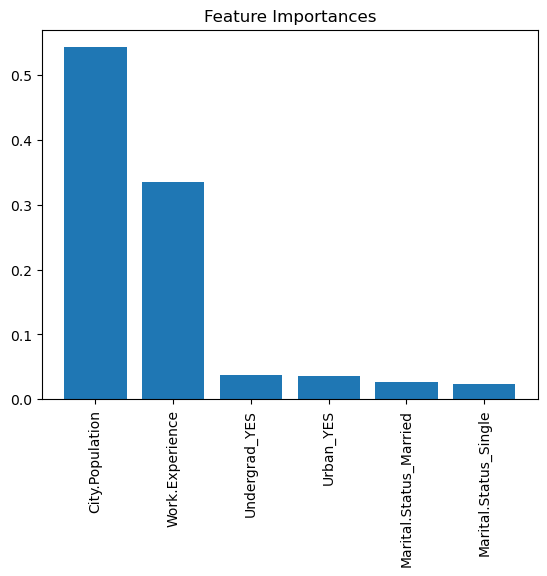

In [22]:

# Bar chart of feature importances
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

#For Taxable income, City_Population plays a important role and accordingly Work Experience also plays a significant impact. 


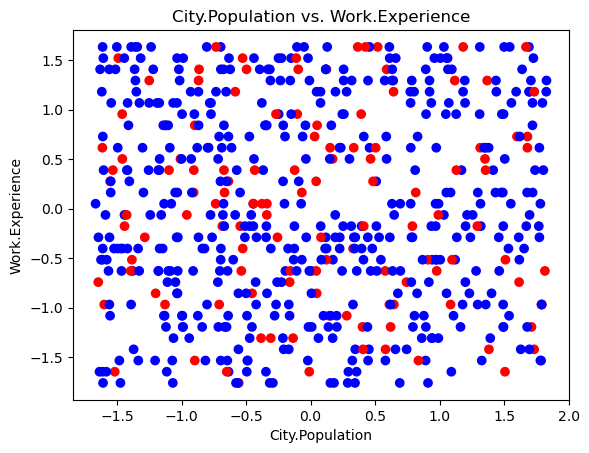

In [23]:

# Scatter plot of City.Population vs. Work.Experience
plt.scatter(df['City.Population'], df['Work.Experience'], c=df['Taxable.Income'].map({'Good': 'blue', 'Risky': 'red'}))
plt.xlabel('City.Population')
plt.ylabel('Work.Experience')
plt.title('City.Population vs. Work.Experience')
plt.show()

#In City Population Taxable income is quite good with more years of experience